## CrossDocked Summary Statistics

In [25]:
import os
from rdkit import Chem
from explore_utils import *
import torch
import matplotlib.pyplot as plt

In [4]:
summary = torch.load('summary_stats.pt')

In [26]:
def get_stats(dictionary, stat):
    
    stats = np.array([dictionary[item][stat] for item in dictionary])
    return stats, stats.mean(), stats.std()

In [13]:
pockets = summary['pockets']
ligands = summary['ligands']

In [14]:
print('Number of bad pockets: ', len(summary["bad_proteins"]))
print('Number of bad ligands: ', len(summary["bad_ligands"]))

Number of bad pockets:  109
Number of bad ligands:  47


In [15]:
num_pockets = len(summary["pockets"])
num_ligands = len(summary["ligands"])
print('Number of unique pockets: ', num_pockets)
print('Number of unique ligands: ', num_ligands)

Number of unique pockets:  144830
Number of unique ligands:  13952


In [28]:
print('pocket residues (mean, std): ', get_stats(pockets, 'residues')[1:])

pocket residues (mean, std):  (51.2028309051992, 11.923966131411023)


In [29]:
print('pocket atoms (mean, std): ', get_stats(pockets, 'atoms')[1:])
print('ligand atoms (mean, std): ', get_stats(ligands, 'atoms')[1:])

pocket atoms (mean, std):  (416.8028309051992, 118.99816136652014)
ligand atoms (mean, std):  (25.56522362385321, 9.449856523253892)


In [30]:
print('pocket bonds (mean, std): ', get_stats(pockets, 'bonds')[1:])
print('ligand bonds (mean, std): ', get_stats(ligands, 'bonds')[1:])

pocket bonds (mean, std):  (413.2228958088794, 118.95636358075343)
ligand bonds (mean, std):  (27.58256880733945, 10.64401590537563)


In [31]:
print('pocket heavy atoms (mean, std): ', get_stats(pockets, 'heavy')[1:])
print('ligand heavy atoms (mean, std): ', get_stats(ligands, 'heavy')[1:])

pocket heavy atoms (mean, std):  (401.5289926120279, 89.9833020084121)
ligand heavy atoms (mean, std):  (25.45075974770642, 9.402994029979457)


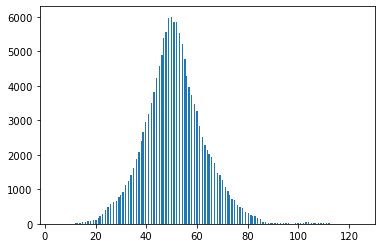

In [35]:
hist = plt.hist(get_stats(pockets,'residues')[0], bins='auto')  

## SBDD-3D Samples

In [21]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG
from svglib.svglib import svg2rlg
from reportlab.graphics import renderPDF
import torch
import os
import numpy as np
import matplotlib.pyplot as plt

In [11]:
samples = os.listdir('outputs/sample-1_2022_03_31__09_46_24/SDF/')

In [13]:
mol_atoms = []

In [14]:
for sample in samples:
    supplier = Chem.SDMolSupplier(f'outputs/sample-1_2022_03_31__09_46_24/SDF/{sample}', sanitize=False, removeHs=False)
    mol = supplier[0]
    mol_atoms.append(mol.GetNumAtoms())

In [19]:
stats = np.array(mol_atoms)
stats.mean(), stats.std()

(21.787610619469028, 5.0457224982948405)

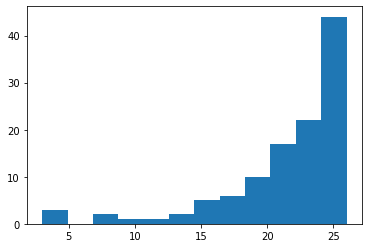

In [22]:
hist = plt.hist(stats, bins='auto')  

In [23]:
supplier = Chem.SDMolSupplier('outputs/sample-1_2022_03_31__09_46_24/SDF/0.sdf', sanitize=False, removeHs=False)
mol = supplier[0]

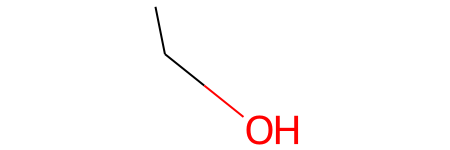

In [24]:
mol

In [4]:
#smiles = data['mol_smiles'][idx]
#m = Chem.MolFromSmiles(smiles)

def moltosvg(mol, molSize = (300,300), kekulize = True):
    mc = Chem.Mol(mol.ToBinary())
    if kekulize:
        try:
            Chem.Kekulize(mc)
        except:
            mc = Chem.Mol(mol.ToBinary())
    if not mc.GetNumConformers():
        rdDepictor.Compute2DCoords(mc)
    drawer = rdMolDraw2D.MolDraw2DSVG(molSize[0],molSize[1])
    drawer.SetFontSize(30)
    drawer.DrawMolecule(mc)
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()
    return svg.replace('svg:','')

SVG(moltosvg(mol))
with open('./test.svg', 'w') as f:
    f.write(moltosvg(mol))

drawing = svg2rlg('./test.svg')
renderPDF.drawToFile(drawing, f"test.pdf")